In [8]:
from __future__ import division
%pylab inline
import pandas as pd
import numpy as np
import sklearn.cluster as clust

Populating the interactive namespace from numpy and matplotlib


In [260]:
# Clustering parameters
NumClust=2
MaxIter=1000000

# Read in data
# h=['annot',1,2,3,4,5,6,7,8,9,10,11]
peakDF = pd.read_csv('Reb1_annotated_peaks.stats.bed',delimiter=' ',header=0,na_values="NA")
# bedDF.columns=h

# 0->1 scale data
min=peakDF.min(axis=0)
max=peakDF.max(axis=0)
delta=max-min
rescaledDF=peakDF.sub(min,axis=1)
rescaledDF=rescaledDF.divide(delta,axis=1)
rescaledDF=rescaledDF.multiply(255,axis=1)

# Z-score transform data
peakDF=peakDF.sub(peakDF.mean(axis=0),axis=1)
peakDF=peakDF.divide(peakDF.std(axis=0),axis=1)


# Replace the NA values (missing data) with zeros
peakDF=peakDF.fillna(0)
peakDF=peakDF.transpose()
rescaledDF=rescaledDF.fillna(0)
rescaledDF=rescaledDF.transpose()

(array([0, 1], dtype=int32), array([5532, 2736]))

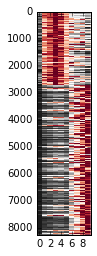

In [261]:
# Perform the k-means clustering
kmeans=clust.KMeans(n_clusters=NumClust,max_iter=MaxIter,init='random')
kmeans.fit(peakDF.ix[:,1:])
rescaledDF['labels'] = kmeans.labels_
rescaledDF.sort_values('labels',inplace=True,ascending=False)
mat=rescaledDF.as_matrix(columns=range(1,11))
# print mat.round()
imshow(mat.round(),cmap='RdGy_r',interpolation='none',aspect=0.005)
np.unique(rescaledDF['labels'],return_counts=True)

(array([0, 1, 2], dtype=int32), array([2090, 2326, 2453]))

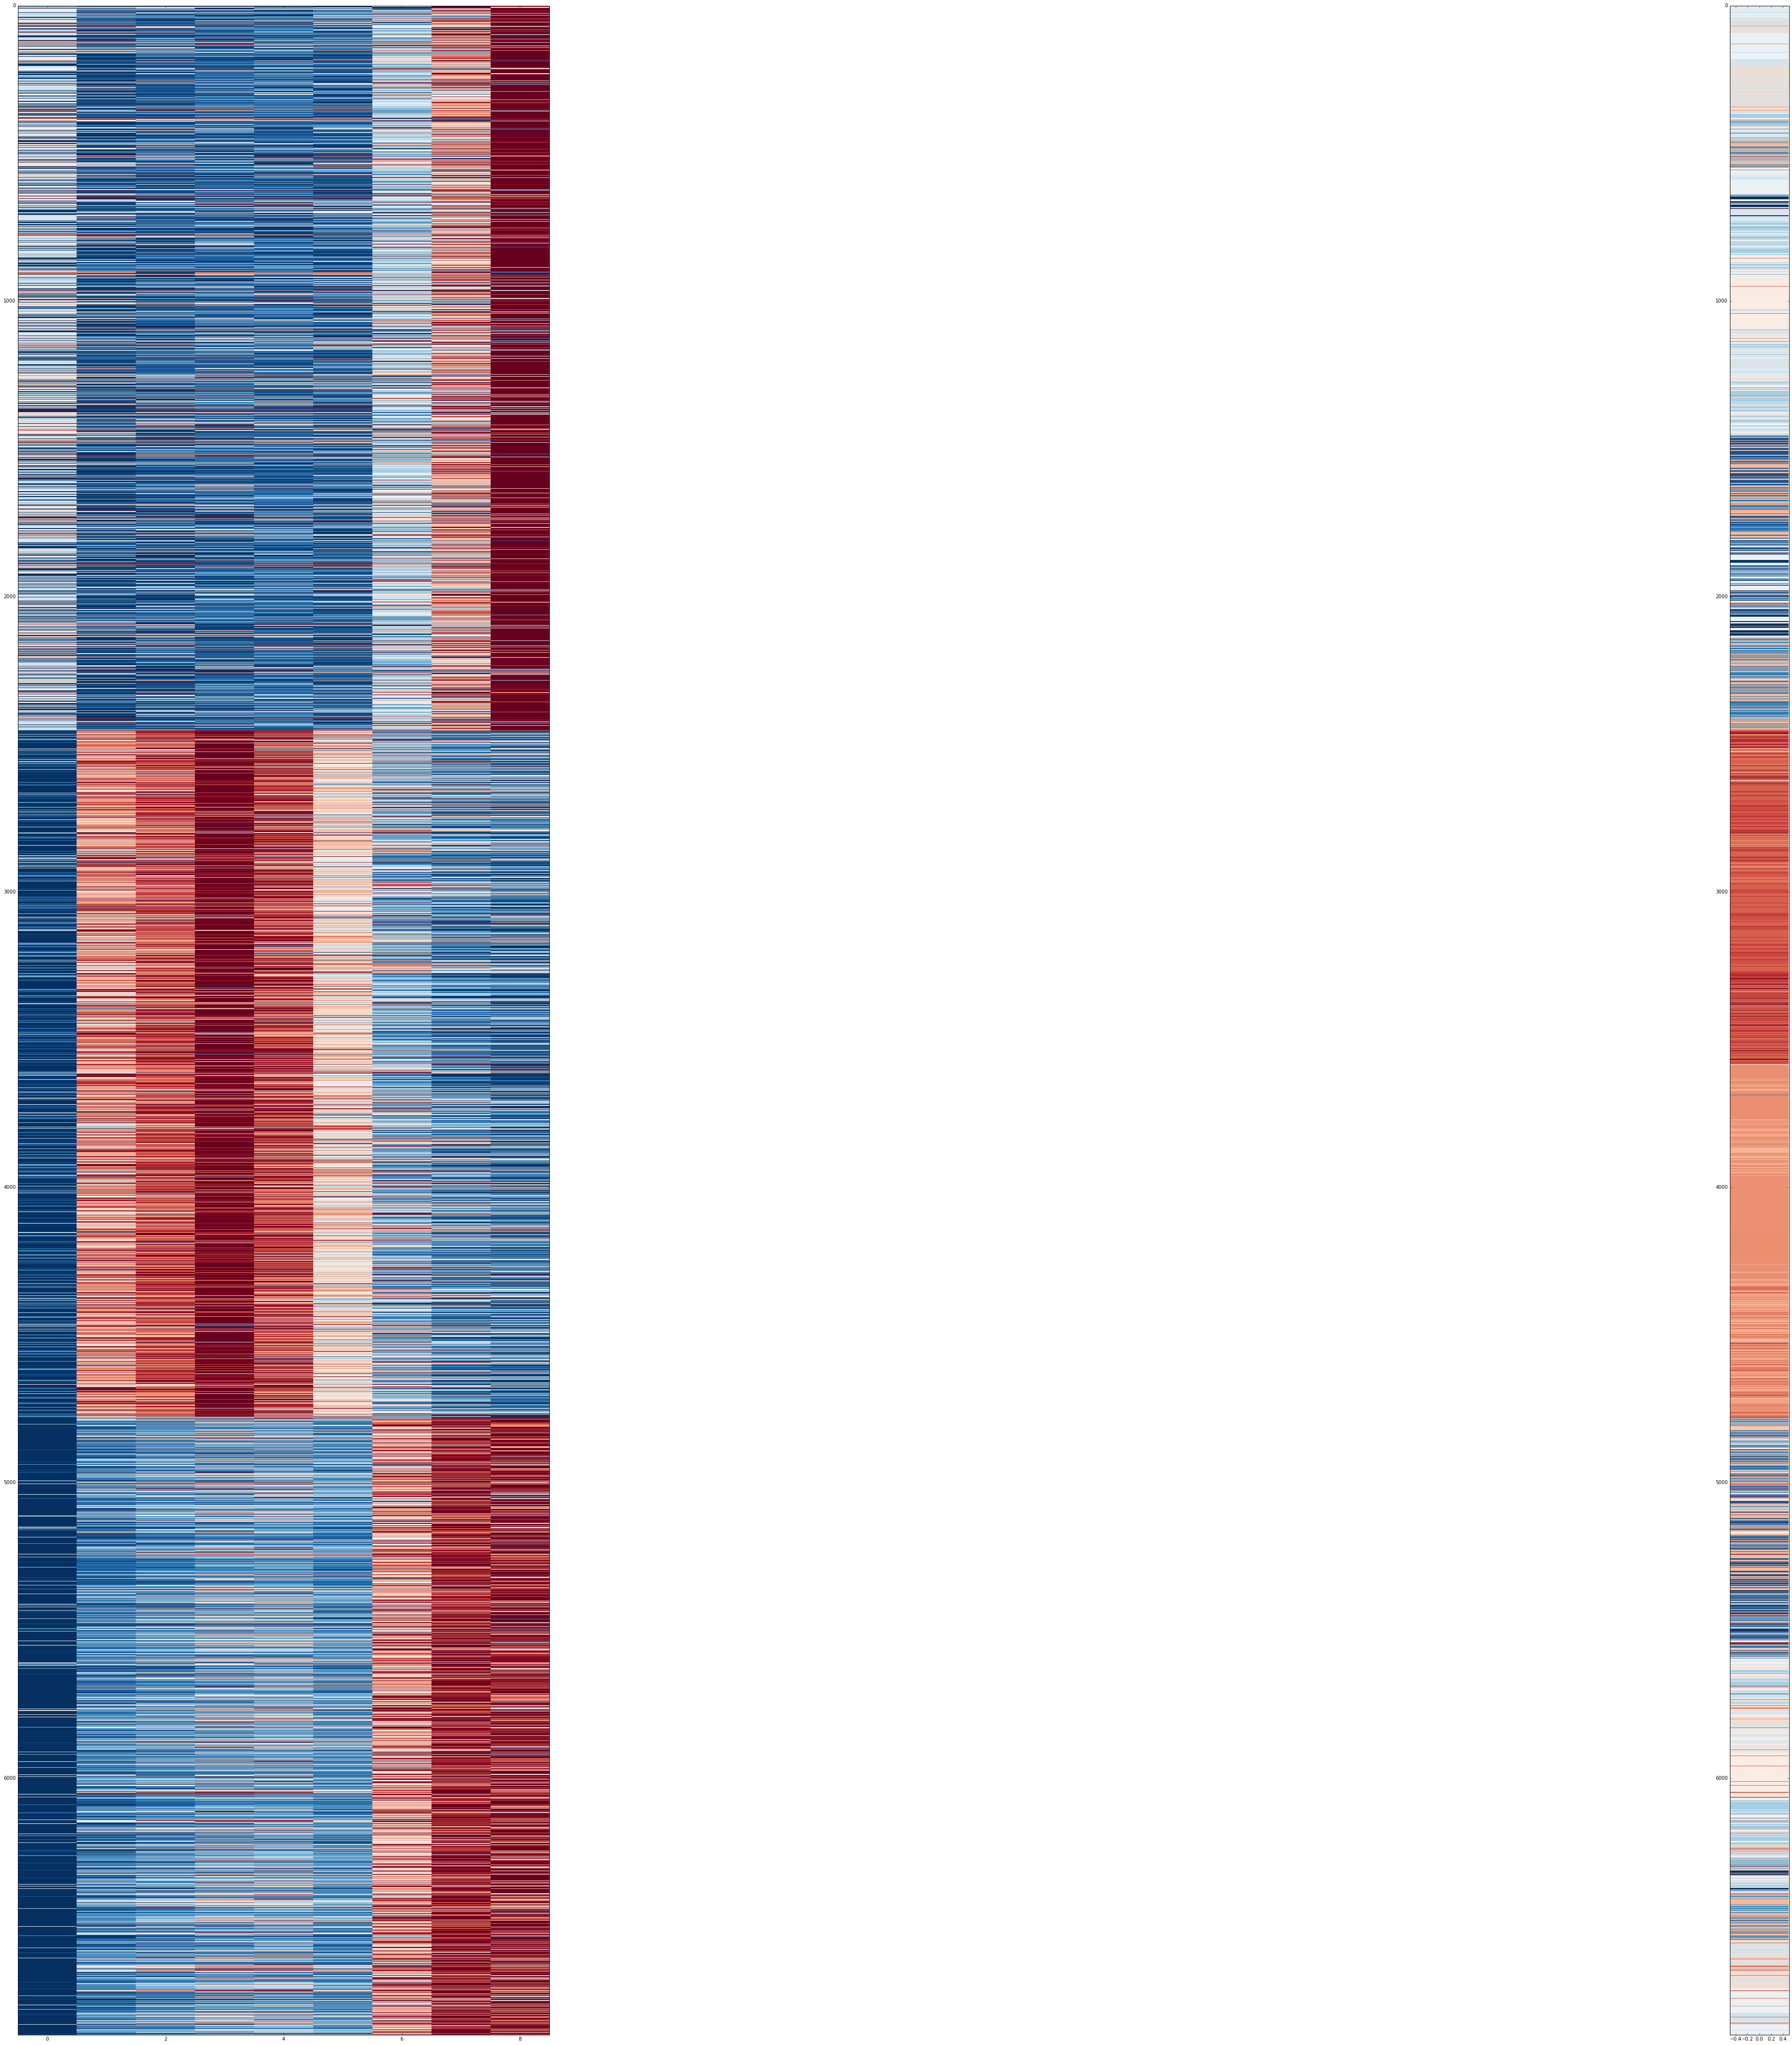

In [386]:
df=pd.read_csv('reb1_with_scores.txt',delimiter='\t',header=0)
names=['a','b','c','d','e','f','g','h','i','j','k','l']
df.fillna(0,inplace=True)
df.columns=names

kmeans=clust.KMeans(n_clusters=3,max_iter=1000000,init='random')
kmeans.fit(df.ix[:,1:10])
min=df.ix[:,1:10].min(axis=1)
max=df.ix[:,1:10].max(axis=1)
delta=max-min
df.ix[:,1:10]=df.ix[:,1:10].sub(min,axis=0)
df.ix[:,1:10]=df.ix[:,1:10].divide(delta,axis=0)
df.ix[:,1:10]=df.ix[:,1:10].multiply(255,axis=0)
min=df.ix[:,11].min()
max=df.ix[:,11].max()
delta=max-min
df.ix[:,11]=df.ix[:,11].sub(min)
df.ix[:,11]=df.ix[:,11].divide(delta)
df.ix[:,11]=df.ix[:,11].multiply(255)
df['labels']=kmeans.labels_

# df.sort_values(['labels','l'],ascending=[0,1],inplace=True)
df.sort_values(['labels'],ascending=[0],inplace=True)
mscore=np.asmatrix(df.ix[:,11].round())
hmap=np.asmatrix(df.ix[:,1:10].round())
fig = plt.figure(figsize=(100,75))
a = fig.add_subplot(1,2,1)
imshow(hmap,cmap='RdBu_r',interpolation='none',aspect=0.005)

a = fig.add_subplot(1,2,2)
imshow(mscore.transpose(),cmap='RdBu',interpolation='none',aspect=0.005)


np.unique(df['labels'],return_counts=True)


In [259]:
for (name,ClustID) in zip(rescaledDF.index,rescaledDF['labels']):
    print name, "\t", ClustID

chrX_211777_211778_9.076003136_211766_211775_TTCGCCCGC_+_469_0.004249573_Fast 	2
chrVII_766081_766082_9.105197267_766094_766103_ATGACTCGT_+_490_0.00270462_Slow 	2
chrVII_762261_762262_8.258202172_762262_762271_ATTCCCCTT_+_570_0.000335693_Slow 	2
chrXIII_759351_759380_41.29101086_759356_759365_GTTACTAAG_-_451_0.005279541_Fast 	2
chrXIII_759416_759417_9.528694814_759419_759428_GTTTGCCGC_-_511_0.001399994_Fast 	2
chrXIII_763541_763542_8.469950946_763517_763526_ATTCCTCGA_+_490_0.00270462_Fast 	2
chrXIII_768409_768411_25.40985284_768418_768427_GCTACCGAC_+_451_0.005279541_Fast 	2
chrXIII_768503_768504_12.28142887_768481_768490_TTTAAACTG_-_449_0.006309509_Fast 	2
chrXIII_773883_773884_12.77467981_773864_773873_TTGAGCCAC_-_409_0.011459351_Fast 	2
chrXIII_774013_774014_13.76367029_773997_774006_GATATCCGA_+_511_0.001399994_Fast 	2
chrXIII_774057_774060_28.44429566_774072_774081_AATACACTA_+_470_0.003219604_Fast 	2
chrXIII_774183_774184_8.681699719_774173_774182_TTTTCCCTT_+_549_0.000747681_Fast 	2